In [2]:
import pandas as pd
import json
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [3]:
# load festivals data
festivals_raw = json.load(open('all_festival_bands_2017.json'))

In [69]:
# extract genres (and other info) of bands in festivals
bands = []
for f in festivals_raw:
    for b in f['bands']:
        #print('{} - {} - {} - {} - {}'.format(f['name'], b['name'], b['popularity'], b['followers']['total'], b['genres']))
        bands.append({'festival': f['name'], 
                      'band' : b['name'], 
                      'popularity': b['popularity'], 
                      'followers' : b['followers']['total'], 
                      'genres' : b['genres']})

# convert to pandas DF
bands = pd.DataFrame.from_dict(festivals_list)
bands.head()

,band,festival,followers,genres,popularity,num_genres
0,SFDK,al_rumbo,151813,"[deep latin hip hop, latin hip hop, spanish hi...",54,3
1,Mala Rodríguez,al_rumbo,100795,"[deep latin hip hop, flamenco, latin alternati...",51,5
2,Estricnina,al_rumbo,6809,[spanish rock],38,1
3,La Raíz,al_rumbo,73371,"[spanish punk, spanish rock]",54,2
4,La Pegatina,al_rumbo,105792,"[spanish pop, spanish punk, spanish rock]",51,3


## Explore genres

In [70]:
# Number of different genres
all_unqiue_genres = set(bands['genres'].sum())
print('Total number of different genres: {}'.format(len(all_unqiue_genres)))

Total number of different genres: 479


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f0839ea90>]],
      dtype=object)

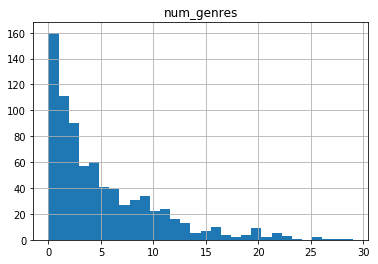

In [71]:
# Distribution of number of genres per band
bands['num_genres'] = bands['genres'].apply(lambda x: len(x))
bands.hist(column='num_genres', bins=30)
#for ng in range(0,11):
#    print('Bands with {} genres: {}'.format(ng, len(festivals_list[festivals_list['num_genres'] == ng])))

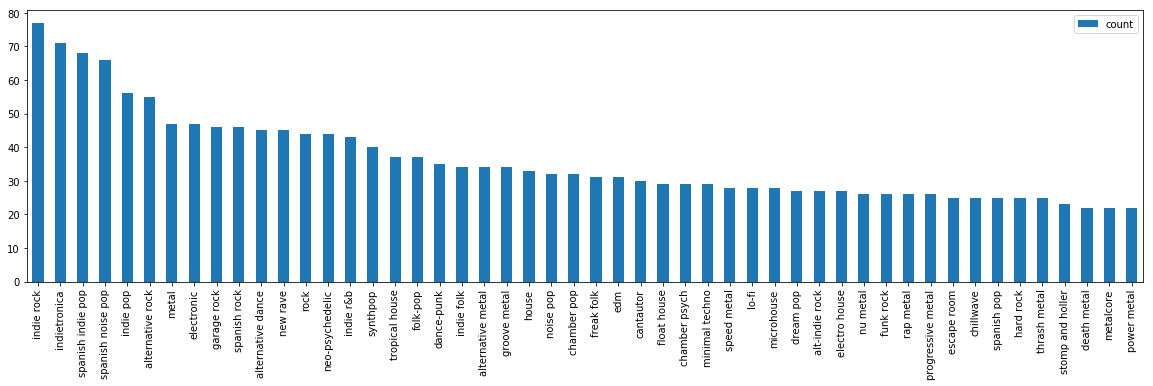

In [72]:
# Most common genres
all_genres = bands['genres'].sum()

from collections import Counter
genres_counts = Counter(all_genres)
gc_df = (pd.DataFrame.from_dict(genres_counts, orient='index'))
gc_df.columns=['count']
gc_df.sort_values(by='count',ascending=False).head(50).plot(kind='bar', figsize=(20,5))

## Convert list of genres to binary dimensions

In [85]:
# https://stackoverflow.com/questions/32387266/converting-categorical-values-to-binary-using-pandas
# https://stackoverflow.com/questions/40213177/pandas-convert-multiple-categories-to-dummies

## Explore PCA to reduce dimensionality

## Explore K-means to cluster bands